In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
dataset_path = "dataset.csv"
df = pd.read_csv(dataset_path)

# Display first few rows
df.head()
    

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [26]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df = df.drop(columns=['timestamp'])


# One-hot encoding for categorical variables (country and sector)
df = pd.get_dummies(df, columns=['country', 'sector'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['value'])  # Features
y = df['value']  # Target (CO2 emissions)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data
print(X_train.head())


              date  year  month  day  country_China  country_EU27 & UK  \
74700   14/05/2020  1970      1    1          False              False   
3786    28/09/2019  1970      1    1          False              False   
67788   07/01/2019  1970      1    1          False              False   
37105   04/11/2021  1970      1    1          False              False   
128697  06/02/2022  1970      1    1          False              False   

        country_France  country_Germany  country_India  country_Italy  ...  \
74700            False            False          False          False  ...   
3786             False            False          False           True  ...   
67788            False            False          False          False  ...   
37105            False            False           True          False  ...   
128697           False            False          False          False  ...   

        country_Russia  country_Spain  country_UK  country_US  country_WORLD  \
74700 

In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df = df.drop(columns=['timestamp'])


# One-hot encoding for categorical variables (country and sector)
df = pd.get_dummies(df, columns=['country', 'sector'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['value'])  # Features
y = df['value']  # Target (CO2 emissions)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data
print(X_train.head())


KeyError: 'timestamp'

In [ ]:

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R2): {r2}")
    

Mean Absolute Error (MAE): 2.2666399099055714
Mean Squared Error (MSE): 14.107713724725674
R-squared Score (R2): 0.6021391650793366


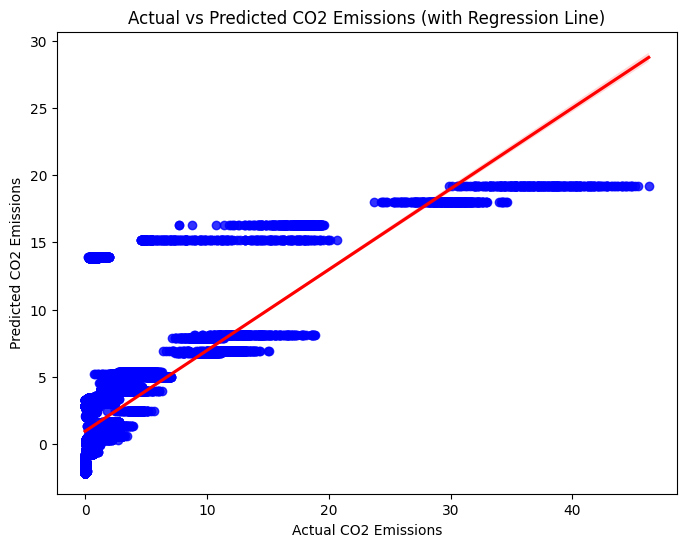

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (with Regression Line)")
plt.show()
